In [1]:
import numpy
import pandas
import sklearn
from matplotlib import pyplot

In [2]:
# Abstract class to inherit
from abc import ABC, abstractmethod

class LinearRegressionFromScratch(ABC):
    """
    Linear Regression from scratch

    Inheritance:
        ABC: abstract class 
    """
    
    def __init__(
        self, 
        total_iterations: int, 
        learning_rate: float = 0.01, 
    ) -> None:
        """
        __init__: constructor for LinearRegressionFromScratch class

        Args:
            self (undefined):
            learning_rate (float):
            total_iterations (int):

        Returns:
            None
        """
        self.total_iterations: int = total_iterations
        self.learning_rate: float = learning_rate
        self.mse_history = []

    
    def FIT_MODEL(
        self,
        X: numpy.ndarray,
        y: numpy.ndarray,
    ) -> None:
        """
        FIT_MODEL: Fits linear model via gradient descent

        Args:
            self (undefined):
            X (numpy.ndarray):
            y (numpy.ndarray):

        Returns:
            None

        """
        print(f"Shape of Data: {X.shape}")
        self.total_samples, self.total_features = X.shape
        
        print(f"self.total_samples: {self.total_samples}")
        print(f"self.total_features: {self.total_features}")
        
        self.weights: numpy.ndarray = numpy.zeros(self.total_features)
        self.weights: numpy.ndarray = numpy.zeros(self.total_features)
        self.bias: float = 0.0
        print("INITIAL STAGE")
        print(f"self.weights: {self.weights}")
        print(f"self.bias: {self.bias}\n")
        
        self.X: numpy.ndarray = X
        self.y: numpy.ndarray = y
        
        for i in range(1, self.total_iterations+1): 
            self.UPDATE_WEIGHTS_and_BIAS()
            print(f"ITERATION: {i}")
            print(f"self.weights: {self.weights}")
            print(f"self.bias: {self.bias}\n")

        print(f"Final model weights \t: {self.weights}")
        print(f"Final model bias \t: {self.bias}")

    
    def UPDATE_WEIGHTS_and_BIAS(self):
        """
        UPDATE_WEIGHTS_and_BIAS: via gradient descent algorithm
        
        Gradient descent: first-order, iterative optimization algorithm 
        to find a local/global minima of a differentiable function.

        Args:
            self (undefined):

        """
        y_prediction: numpy.ndarray = self.PREDICT(self.X)
        
        # error[i] = yi - (y_pred)i
        error = self.y - y_prediction
        # print(f"Error: {error}")
        
        total_squared_error: float = numpy.sum(error ** 2)
        # print(f"total_squared_error: {total_squared_error}")
        
        # mse = (1/n) * Sum(i=1..n)[ ( Y_actual_i - Y_pred_i )^2 ]
        # mse = (1/n) * Sum(i=1..n)[ ( Y_actual_i - (m.xi + b) )^2 ]
        mean_squared_error = numpy.mean(error ** 2)
        print(f"mean_squared_error: {mean_squared_error}")
        self.mse_history.append(mean_squared_error)
        
        # PD_of_mse_wrt_(slope/m) = (1/n) * Sum(i=1..n)[ 2 * ( Y_actual_i - (m.xi + b) ) * (-xi) ]
        # PD_of_mse_wrt_(slope/m) = -(2/n) * Sum(i=1..n)[ ( Y_actual_i - (m.xi + b) ) * (xi) ]
        # PD_of_mse_wrt_(slope/m) = -(2/n) * Sum(i=1..n)[ ( error[i] ) * (xi) ]
        partial_derivative_of_mse_wrt_slope = -(2.0 / self.total_samples) * numpy.dot(self.X.T, error)
        
        # PD_of_mse_wrt_(bias/b) = (1/n) * Sum(i=1..n)[ 2 * ( Y_actual_i - (m.xi + b) ) * (-1) ]
        # PD_of_mse_wrt_(bias/b) = -(2/n) * Sum(i=1..n)[ ( Y_actual_i - (m.xi + b) ) ]
        # PD_of_mse_wrt_(slope/m) = -(2/n) * Sum(i=1..n)[ ( error[i] ) ]
        partial_derivative_of_mse_wrt_bias = -(2.0 / self.total_samples) * numpy.sum(error)
        
        print("∂MSE/∂m:", partial_derivative_of_mse_wrt_slope)
        print("∂MSE/∂b:", partial_derivative_of_mse_wrt_bias)
        
        # m = m - (learning_rate) * partial_derivative_of_mse_wrt_slope
        self.weights -= self.learning_rate * partial_derivative_of_mse_wrt_slope
        
        # b = b - (learning_rate) * partial_derivative_of_mse_wrt_bias
        self.bias -= self.learning_rate * partial_derivative_of_mse_wrt_bias
        
    
    def PREDICT(
        self, 
        predictions: numpy.ndarray,
    ) -> numpy.ndarray:
        """
        PREDICT: dot product of predictions with self.weights + self.bias

        Args:
            self (undefined):
            predictions (numpy.ndarray):

        Returns:
            numpy.ndarray
        """
        return predictions.dot(self.weights) + self.bias
    

    def CALCULATE_SCORE_MSE(
        self,
        y_test: numpy.ndarray,
        y_pred: numpy.ndarray,
    ) -> float:
        
        return numpy.mean((y_test - y_pred) ** 2)
    
    
    def PLOT_MSE_VS_NUM_EPOCHS(
        self, 
        last_elements_to_plot: int = None
    ) -> None:
        """
        PLOT_MSE_VS_NUM_EPOCHS

        Args:
            self (undefined):
            last_elements_to_plot (int):

        Returns:
            None

        """
        if last_elements_to_plot == None:
            last_elements_to_plot = self.total_iterations
        else:
            last_elements_to_plot = min(last_elements_to_plot, self.total_iterations)
        nums = [i for i in range(self.total_iterations)]
        pyplot.plot(
            nums[-last_elements_to_plot:],
            self.mse_history[-last_elements_to_plot:],
            color='blue', 
            linewidth=2, 
            label="MSE",
        )
        pyplot.xlabel("Iterations")
        pyplot.ylabel("MSE")
        pyplot.title("MSE vs Iterations")
        pyplot.grid(True, linestyle='--', alpha=0.6)
        pyplot.legend()
        pyplot.show()


In [ ]:
# A closed-form solution is a formula that gives you the 
# result in a single step, rather than through repeated 
# computation (like gradient descent). 
# It's derived from calculus and linear algebra.
class LinearRegressionFromScratchUsingNormalEquation(ABC):
    """
    Linear Regression from scratch a closed form solution using normal 

    Inheritance:
        ABC: abstract class 
    """
    
    def __init__(self) -> None:
        self.weights = None
    
    def fit_model(
        self, 
        X_train: numpy.ndarray, 
        y_train: numpy.ndarray
    ) -> None:
        # Add column of 1s to X for bias
        X_bias = numpy.c_[numpy.ones((X_train.shape[0], 1)), X_train]  # shape: (n_samples, n_features + 1)
        print(X_bias)

        # Compute weights using normal equation
        self.weights = numpy.linalg.inv((X_bias).T @ (X_bias)) @ (X_bias).T @ y_train
        print(self.weights)
        
    def predict(
        self, 
        X_test: numpy.ndarray,
    ) -> numpy.ndarray:
        X_bias = numpy.c_[numpy.ones((X_test.shape[0], 1)), X_test]
        return X_bias @ self.weights
        
    @property
    def slope_or_weights(self):
        return self.weights[1:]

    @property
    def bias(self):
        return self.weights[0]

In [4]:
df = pandas.read_csv(
    './data/advertising.csv',
    delimiter=',',
    nrows=None,
) 

In [5]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
X = df.iloc[:, :-1].values # df.drop('Sales', axis=1)
y = df.iloc[:, -1].values  # df["Sales"]

In [7]:
type(X)

numpy.ndarray

In [8]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [9]:
linreg_model = LinearRegressionFromScratchUsingNormalEquation() 

In [10]:
linreg_model.fit_model(X_train=X_train, y_train=y_train)
y_preds = linreg_model.predict(X_test=y_train)

[[  1.  284.3  10.6   6.4]
 [  1.  184.9  21.   22. ]
 [  1.  112.9  17.4  38.6]
 [  1.   23.8  35.1  65.9]
 [  1.  290.7   4.1   8.5]
 [  1.   19.4  16.   22.3]
 [  1.  293.6  27.7   1.8]
 [  1.   18.7  12.1  23.4]
 [  1.  134.3   4.9   9.3]
 [  1.   25.6  39.    9.3]
 [  1.  100.4   9.6   3.6]
 [  1.   80.2   0.    9.2]
 [  1.  188.4  18.1  25.6]
 [  1.  177.   33.4  38.7]
 [  1.  125.7  36.9  79.2]
 [  1.  209.6  20.6  10.7]
 [  1.  142.9  29.3  12.6]
 [  1.  184.9  43.9   1.7]
 [  1.  222.4   4.3  49.8]
 [  1.  241.7  38.   23.2]
 [  1.   17.2  45.9  69.3]
 [  1.  120.5  28.5  14.2]
 [  1.   89.7   9.9  35.7]
 [  1.  191.1  28.7  18.2]
 [  1.   75.5  10.8   6. ]
 [  1.  193.2  18.4  65.7]
 [  1.   85.7  35.8  49.3]
 [  1.  266.9  43.8   5. ]
 [  1.   39.5  41.1   5.8]
 [  1.  261.3  42.7  54.7]
 [  1.   13.2  15.9  49.6]
 [  1.  193.7  35.4  75.6]
 [  1.  296.4  36.3 100.9]
 [  1.  265.6  20.    0.3]
 [  1.  214.7  24.    4. ]
 [  1.  149.7  35.6   6. ]
 [  1.  131.7  18.4  34.6]
 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
linear_reg_model = LinearRegressionFromScratch(
    total_iterations=100,
    learning_rate=0.00001,
) 

In [ ]:
linear_reg_model.FIT_MODEL(X_train, y_train)

Shape of Data: (140, 3)
self.total_samples: 140
self.total_features: 3
INITIAL STAGE
self.weights: [0. 0. 0.]
self.bias: 0.0

mean_squared_error: 275.35664285714284
∂MSE/∂m: [-5702.78742857  -796.48085714  -995.03957143]
∂MSE/∂b: -31.564285714285713
ITERATION: 1
self.weights: [0.05702787 0.00796481 0.0099504 ]
self.bias: 0.00031564285714285716

mean_squared_error: 45.35601460477048
∂MSE/∂m: [-1960.24806669  -339.17655869  -405.44257302]
∂MSE/∂b: -12.745876680144898
ITERATION: 2
self.weights: [0.07663035 0.01135657 0.01400482]
self.bias: 0.00044310162394430616

mean_squared_error: 17.538256027388506
∂MSE/∂m: [-662.77137053 -179.94337886 -199.98974854]
∂MSE/∂b: -6.207906141446899
ITERATION: 3
self.weights: [0.08325807 0.01315601 0.01600472]
self.bias: 0.0005051806853587752

mean_squared_error: 14.034137008963707
∂MSE/∂m: [-213.11088886 -124.07435889 -127.75312298]
∂MSE/∂b: -3.9283266131181414
ITERATION: 4
self.weights: [0.08538918 0.01439675 0.01728225]
self.bias: 0.0005444639514899566



In [ ]:
y_prediction = linear_reg_model.PREDICT(X_test)

In [ ]:
y_prediction

array([17.33185607, 20.86200196, 25.9973682 ,  6.19561944, 19.89231796,
       11.12457609, 20.65457366,  5.57796964, 17.2663492 , 16.2826154 ,
        4.24179632,  6.25304821, 22.31273228,  3.14217281, 11.89595832,
       15.05803518,  5.00618996, 16.98154102,  8.88534277, 20.01334727,
       23.45775764, 14.26716535,  6.43471602, 25.22033403,  5.78147994,
        5.30176912, 20.73032832, 11.84142726,  8.74666608,  2.73906047,
       16.02606624,  7.62996538, 21.65497675,  9.64157589, 23.6866787 ,
       20.24111005,  7.4829066 , 25.5961488 ,  9.96241031,  3.33160265,
       10.38728995, 13.99351377,  7.15381042,  6.54461835, 17.45484581,
        3.86750031,  8.70737872, 13.63413113, 10.06300585,  8.53021655,
       11.16259177, 13.5747066 ,  8.5888949 ,  6.37117723,  6.50393902,
       11.69546725,  7.36599896, 27.2576736 ,  3.90025424, 15.0433404 ])

In [ ]:
print(X_test.shape, y_test.shape)
mse = linear_reg_model.CALCULATE_SCORE_MSE(y_test=y_test, y_pred=y_prediction)

(60, 3) (60,)


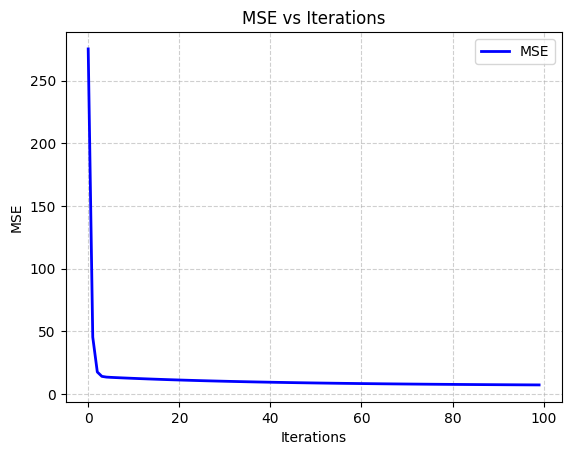

In [ ]:
linear_reg_model.PLOT_MSE_VS_NUM_EPOCHS()

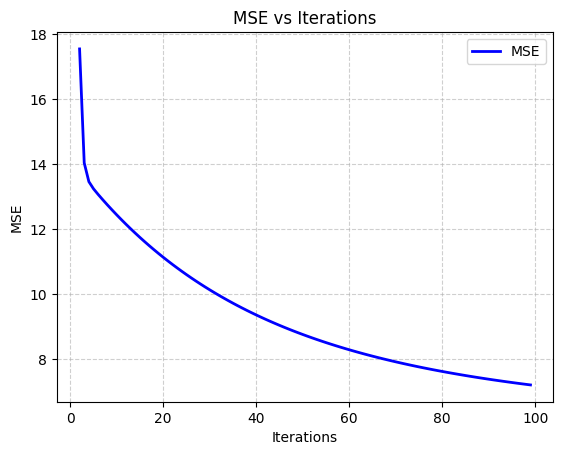

In [ ]:
linear_reg_model.PLOT_MSE_VS_NUM_EPOCHS(last_elements_to_plot=98)

In [ ]:
print(f"Model Mse \t: {mse}")
print(f"Model weights \t: {linear_reg_model.weights}")
print(f"Model bias \t: {linear_reg_model.bias}")

Model Mse 	: 8.472147770993466
Model weights 	: [0.07308116 0.07355532 0.05804883]
Model bias 	: 0.002571478674079057


In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics

ndf = pandas.read_csv('./data/advertising.csv', delimiter=',')

X = ndf[['TV', 'Radio', 'Newspaper']]
y = ndf['Sales']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

sklearn_model = linear_model.LinearRegression()
sklearn_model.fit(X_train, y_train)

# Predictions
y_pred = sklearn_model.predict(X_test)

# MSE
mse_score = metrics.mean_squared_error(y_test, y_pred)

print(f"mse sklearn.    : {mse_score}")
print(f"sklearn weights : {sklearn_model.coef_}")
print(f"sklearn bias    : {sklearn_model.intercept_}")

mse sklearn.    : 2.9077569102710896
sklearn weights : [0.05450927 0.10094536 0.00433665]
sklearn bias    : 4.714126402214134
